In [1]:
from sam_enhancer import SAME

In [2]:
model = SAME(model_path="sam2.1_t.pt")

In [3]:
dataset_dir = '../../../Datasets/SERUSO_DATASETS/test_set/images/'
dataset_dir_mask = '../../../Datasets/SERUSO_DATASETS/test_set/masks/'
save_dir = "../experiments/SAM/masks/"
save_dir_2 = "../experiments/SAM/enhanced/"
coarse_mask_path = "../experiments/Puzzle-CAM/cams/maps/"
spec_img = "before/before-video-000/"

In [4]:
model.compute_masks(origin_path= dataset_dir + spec_img, destination_path= save_dir+ spec_img)

0it [00:00, ?it/s]


0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 3899.5ms
Speed: 18.9ms preprocess, 3899.5ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 2625.7ms
Speed: 3.7ms preprocess, 2625.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 2634.6ms
Speed: 3.3ms preprocess, 2634.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)



0it [00:11, ?it/s]


KeyboardInterrupt: 

In [12]:
import numpy as np

mask_origin_path = coarse_mask_path + spec_img + "frame_0002.npz"

loaded_npz = np.load(mask_origin_path)["array"]
# print(loaded_npz.files)

masks_sam = np.load(save_dir + spec_img + "frame_0002.npz" )["data"]

In [8]:
model.merge_masks(origin_path= coarse_mask_path + spec_img, sam_path= save_dir+ spec_img, destination_path= save_dir_2 + spec_img, number_classes=2)

0it [00:00, ?it/s]

frame_0002.npz
../experiments/Puzzle-CAM/cams/maps/before/before-video-000/frame_0002.npz
frame_0003.npz
../experiments/Puzzle-CAM/cams/maps/before/before-video-000/frame_0003.npz
frame_0004.npz
../experiments/Puzzle-CAM/cams/maps/before/before-video-000/frame_0004.npz
frame_0005.npz


Warning: SAM mask not found ../experiments/SAM/masks/before/before-video-000/./frame_0005.npz

In [16]:
masks_sam

array([[[False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False,  True, ...,  True,  True, False],
        [False, False,  True, ...,  True,  True, False],
        [False, False,  True, ...,  True, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

: 

In [ ]:
new = model.merge_masks_direct(masks_sam, loaded_npz)

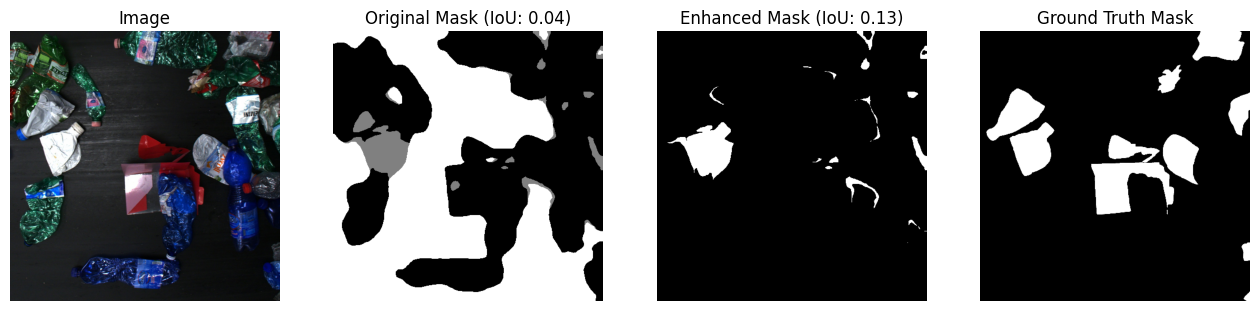

In [9]:
super_path = "frame_0004.npz"
image = dataset_dir + spec_img + "frame_0004.jpg" # image
enhance = save_dir_2 + spec_img + super_path # enhance
coarse = coarse_mask_path + spec_img + super_path # coarse
original = dataset_dir_mask + spec_img + "frame_0004.jpg" # original

SAME.plot_file(image, coarse, enhance, original)


# SAME.plot_file("frame-0001.jpg", "dataset/final/mask/frame-0001.npz", "/home/leonardo/Seruso_dataset/dataset/final/SAM/enhanced/frame-0001.npz", "dataset/test_set/masks/before/before-video-000/frame-0001.jpg")
# SAME.plot_file("dataset/final/image/frame-0008.jpg", "dataset/final/mask/frame-0008.npz", "/home/leonardo/Seruso_dataset/dataset/final/SAM/enhanced/frame-0008.npz", "dataset/test_set/masks/before/before-video-002/frame-0008.jpg")